In [1]:
# plotting libraries
import matplotlib
import matplotlib.pyplot as plt 
# numpy (math) libary
import numpy as np

from os import walk

path1 = '../../../data/'

# torch library and sublibraries
import torch
from torch.autograd import Variable

In [2]:
f = [] # empty list of files
for (dirpath, dirnames, filenames) in walk(path1):
    f.extend(filenames)

# sort list alphabetically
f.sort()
# remove non .ssv files from list
f = [x for x in f if x[-4:]==".ssv"]

In [3]:
# plotting libraries
import matplotlib
import matplotlib.pyplot as plt 
# numpy (math) libary
import numpy as np

from os import walk

path1 = '../../../data/'

# torch library and sublibraries
import torch
from torch.autograd import Variable

In [4]:
print('list of input files:\n* ',f)

temp = np.loadtxt(path1+f[0])
data = {}

data['x'] = np.copy(temp)[:,3:-1]
data['c'] = np.copy(temp)[:,-1]

print('\ninput data has shape:\tx ',  data['x'].shape)
print('target data has shape:\tc ', data['c'].shape)
print()

list of input files:
*  ['full_speach_data.ssv']

input data has shape:	x  (990, 10)
target data has shape:	c  (990,)



In [5]:
# normalize data in the range [0,1]
data['nx'] = np.nan*np.empty(data['x'].shape)

for jj in range(data['x'].shape[1]):
    data['nx'][:,jj] = (data['x'][:,jj]-np.amin(data['x'][:,jj]))/(np.amax(data['x'][:,jj])-np.amin(data['x'][:,jj]))

if 0:
    fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
    ax1 = fig.add_subplot(111)

    ax1.plot(data['nx'])

    plt.show()
    plt.close()

In [6]:
# divide training and test sets
train = {}
test = {}

# The problem is to train the network as well as possible using only
# on data from "speakers" 0-47, and then to test the network on
# speakers 48-89, reporting the number of correct classifications
# in the test set.

# setting '0'
default    = [48*11, 42*11]
# setting '1'

setting = 0
if setting == 0:
    train['x'] = np.copy(data['nx'][:default[0],:])
    train['c'] = np.copy(data['c'][:default[0]])
    
    test['x']  = np.copy(data['nx'][-default[1]:,:])
    test['c']  = np.copy(data['c'][-default[1]:])
#elif setting == 1:

print('\ntrain set')    
print(train['x'].shape)
print(train['c'].shape)

print('\ntest set')
print(test['x'].shape)
print(test['c'].shape)


train set
(528, 10)
(528,)

test set
(462, 10)
(462,)


In [7]:
# create x & y torch Variables
x = Variable( torch.from_numpy(train['x']).float() )
c = Variable( torch.from_numpy(train['c']).long() )
# either input data is float or model becomes doublefloat
# https://stackoverflow.com/questions/44717100/pytorch-convert-floattensor-into-doubletensor?rq=1
# create 
x_test = Variable( torch.from_numpy(test['x']).float() )
c_test = Variable( torch.from_numpy(test['c']).long() )

In [8]:
### import UTILITY functions
from modules.graph_utils import *
    #
    # def show_graph(obj, string='loglog'):
    # def print_spec(obj):

### import NETWORK LOOPS functions
from modules.network_loops import *
    #
    # def run_training(obj, train_x, train_y, valid_x, valid_y):
    # def run_test(obj, test_x, test_y, verbose=True):

from modules.models import *
    #
    # class Baseline(torch.nn.Module):
    #     def __init__(self, D_in, H, D_out, n):
    #     def forward(self, x, n, NL_out=False):
    # class BaseSigmoid(torch.nn.Module):
    #     def __init__(self, D_in, H, D_out, n):
    #     def forward(self, x, n, NL_out=False):
    # class BestFitSigmoid(torch.nn.Module):
    #     def __init__(self, D_in, H, D_out, n):
    #     def forward(self, x, n, NL_out=False):
    #
    # def generate_entry(obj, verbose = False):

# prints errors in semi-log axis
show_type = 'lin'

# some colors
colors = (('xkcd:orange', 'xkcd:red'),#
          ('xkcd:blue', 'xkcd:purple'),#
          ('xkcd:green', 'xkcd:lime'),#
         )

In [9]:
### dimensions of 
# N is batch size
N     = train['x'].shape[0]
# D_in is input dimension
D_in  = train['x'].shape[1]
# H*n is the hidden layer dimension
H     = 11
n     = 8
# is the last hidden layer size
D_out = 11

# numer of epochs
epochs = int(4e3)

# save things to file?
save_to_file=True

In [10]:
##### model settings
k = 1e-2
base_lr = k*5e0
sigm_lr = k*12
best_lr = k*.65e-1
fitr_lr = k*0.6

base_mom = 0.25
sigm_mom = 0.25
best_mom = 0.5
fitr_mom = 0.0

In [11]:
# settings: '' name, H = width of hidden layers, n = number of hidden H-layers,
#           NL_out = nonlinear output layer/sum-only output layer,
#           'model'
#           'criterion' and parameters
#           'optimizer' and parameters

LL = []
#for size in [[11,2], [11,3], [22,2], [22,3]]:
#    for NL_type in [ ['base', base_lr, base_mom, False],
#                      ['sigmoid', sigm_lr, sigm_mom, True],
#                      ['bestfit', best_lr, best_mom, True]
#                    ]:
#        LL.append(
#            [['%s %dx%d'%(NL_type[0], size[0], size[1]), N, D_in, size[0], size[1], D_out, NL_type[3], epochs],
#             NL_type[0],
#             'CEL', [True],
#             'SGD', [NL_type[1], NL_type[2]],
#             'StepLR', [100, 0.99]
#            ]
#        )
size = [22,2]
NL_type = ['fitflatrelu', fitr_lr, 0.0, True]
rep = 2
par_size = 2
#for lrr in np.linspace(1e-3,5e-3,6):
#    for jj in range(rep):
#        LL.append(
#            [['%d lrr %.1e'%(jj,lrr), N, D_in, size[0], size[1], D_out, NL_type[3], epochs],
#             NL_type[0],
#             'CEL', [True],
#             'SGD', [lrr, NL_type[2]], #'SGD', [NL_type[1], NL_type[2]],
#             'StepLR', [500, 0.8]
#            ]
#        )
for mom in [0,0.5]:
    for jj in range(rep):
        LL.append(
            [['%d mom %.1e'%(jj,mom), N, D_in, size[0], size[1], D_out, NL_type[3], epochs],
             NL_type[0],
             'CEL', [True],
             'SGD', [NL_type[1], mom], #'SGD', [NL_type[1], NL_type[2]],
             'StepLR', [500, 0.8]
            ]
        )
#for gamma in [0.75,0.8]:
#    for jj in range(rep):
#        LL.append(
#            [['%d gamma %.2f'%(jj,gamma), N, D_in, size[0], size[1], D_out, NL_type[3], epochs],
#             NL_type[0],
#             'CEL', [True],
#             'SGD', [NL_type[1], NL_type[2]],
#             'StepLR', [500, gamma]
#            ]
#        )

print(len(LL))

models = {}
results = []

verb=False

print(LL[0])

4
[['0 mom 0.0e+00', 528, 10, 22, 2, 11, True, 4000], 'fitflatrelu', 'CEL', [True], 'SGD', [0.006, 0], 'StepLR', [500, 0.8]]


In [12]:
for ii in range(len(LL)):
    models[ii] = generate_entry(LL[ii], verbose=verb)
    run_training(models[ii], x, c, x_test, c_test)
    results.append( max(models[ii][-3][:]) )
    print('%s\t%.2f%%'%(models[ii][0][0],results[ii]) )


# # # # # # # # # # # # # #

epochs	error		validation
200 	2.38249 	2.39342 	12.12
400 	2.36985 	2.38761 	15.15
600 	2.36217 	2.38456 	15.58
800 	2.35045 	2.37873 	15.80
1000 	2.33168 	2.37260 	16.02
1200 	2.32635 	2.36869 	15.37
1400 	2.31899 	2.36893 	13.64
1600 	2.30379 	2.35854 	16.02
1800 	2.29653 	2.35856 	15.58
2000 	2.28814 	2.35303 	20.35
2200 	2.28556 	2.35120 	19.70
2400 	2.26517 	2.33758 	18.40
2600 	2.25367 	2.33394 	19.05
2800 	2.24453 	2.33252 	19.91
3000 	2.23732 	2.31678 	21.21
3200 	2.22615 	2.31398 	19.26
3400 	2.22472 	2.31178 	20.13
3600 	2.21786 	2.31443 	19.48
3800 	2.24751 	2.31654 	20.56
4000 	2.24247 	2.31472 	21.00
0 mom 0.0e+00	21.21%

# # # # # # # # # # # # # #

epochs	error		validation
200 	2.39528 	2.39806 	8.44
400 	2.39186 	2.39544 	10.17
600 	2.38860 	2.39328 	12.55
800 	2.38648 	2.39177 	14.07
1000 	2.38388 	2.39012 	14.94
1200 	2.38163 	2.38880 	16.45
1400 	2.37974 	2.38753 	16.23
1600 	2.37805 	2.38672 	16.45
1800 	2.37650 	2.38558 	16.88
2000 	2.

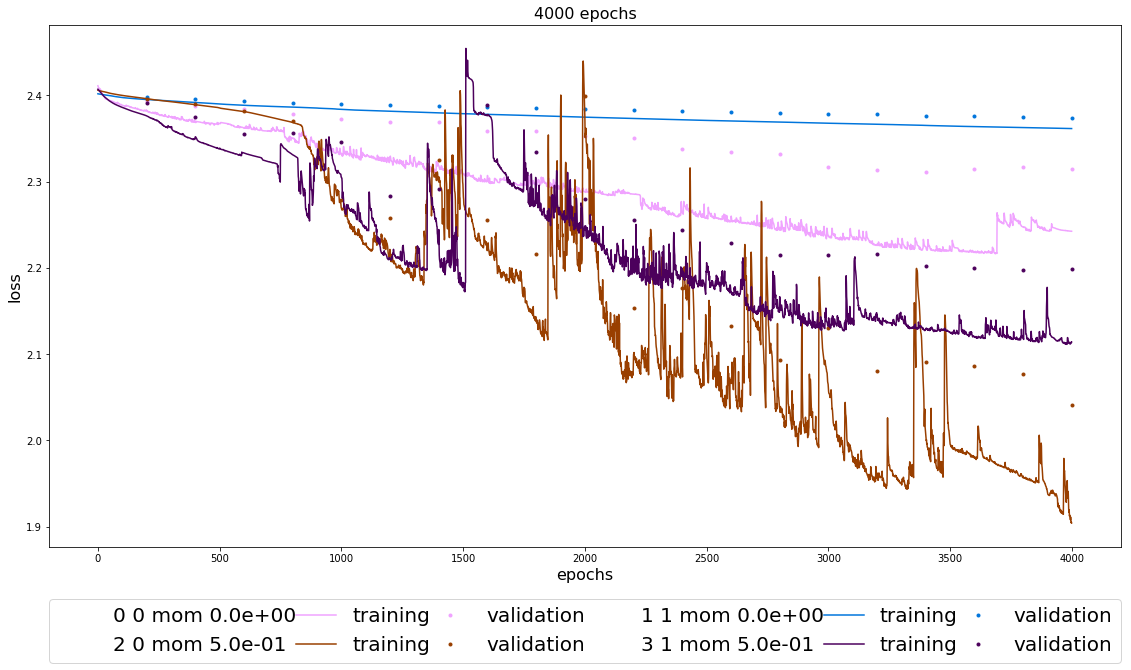

In [13]:
fig, ax1, error, valid = show_graph(models, show_type)
plt.show()

In [14]:
for ii,mm in models.items():
    print('%s\t%3.2f %%'%(models[ii][0][0], results[ii]))

0 mom 0.0e+00	21.21 %
1 mom 0.0e+00	19.70 %
0 mom 5.0e-01	39.18 %
1 mom 5.0e-01	35.06 %


In [15]:
for jj in range(par_size):
    #print('{:.4f}: ({:.2f} ± {:.2f})%'.format(models[rep*jj][5][0],np.average(results[rep*jj:rep*(jj+1)]),np.std(results[rep*jj:rep*(jj+1)])))
    print('{:.2f}: ({:.2f} ± {:.2f})%'.format(models[rep*jj][5][1],np.average(results[rep*jj:rep*(jj+1)]),np.std(results[rep*jj:rep*(jj+1)])))
    #print('{:.2f}: ({:.2f} ± {:.2f})%'.format(models[rep*jj][7][1],np.average(results[rep*jj:rep*(jj+1)]),np.std(results[rep*jj:rep*(jj+1)])))

0.00: (20.45 ± 0.76)%
0.50: (37.12 ± 2.06)%


In [17]:
print(models[0][:-3])

[['0 mom 0.0e+00', 528, 10, 22, 2, 11, True, 4000], FitFlatReLU(
  (linear0): Linear(in_features=10, out_features=22)
  (linear1): Linear(in_features=22, out_features=22)
  (linear2): Linear(in_features=22, out_features=22)
  (linearOut): Linear(in_features=22, out_features=11)
), CrossEntropyLoss(
), [True], <torch.optim.sgd.SGD object at 0x7fe56024b860>, [0.006, 0], <torch.optim.lr_scheduler.StepLR object at 0x7fe5602aee48>, [500, 0.8]]
